# Linear Regression




In [25]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# PART A : Prerequisite for linear regression implementation

## 1.Create  an  array  x  =  [1,  1,  2,  3,  4,  3,  4,  6,  4]  using  numpy.  Calculate  a  function h(x)=t0+t1*x, where t0=1.2 and t1=0.5, for all values of x and plot a graph with x on one axis and h(x)on another axis.

In [26]:
x=np.array([1,1,2,3,4,3,4,6,4])

In [27]:
def h(x, t0=1.2, t1=0.5):
    return t0+t1*x

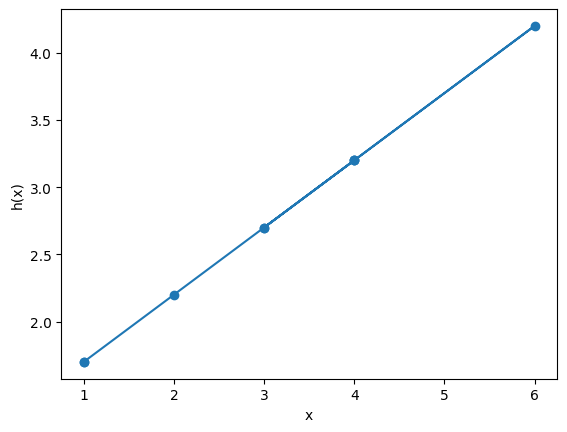

In [28]:
#plot the data
plt.plot(x,h(x),marker='o')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.show()

## 2. Create two arrays A and B with the following values using numpy array. Let (Ai,Bi) represent a data point with i th element of A and B. A = [1, 1, 2, 3, 4, 3, 4, 6, 4] B = [2, 1,  0.5,  1,  3,  3,  2,  5,  4]  Find  out  the  dot  product  of  the  vectors.  [Hint  use  numpy np.dot(a,b)]

In [29]:
A = np.array([1,1,2,3,4,3,4,6,4])
B = np.array([2,1,0.5,1,3,3,2,5,4])
C = np.dot(A,B)

In [30]:
C

82.0

## 3. Plot a graph marking the data points (Ai,Bi) with A on the X-axis and B on the Y-axis.  

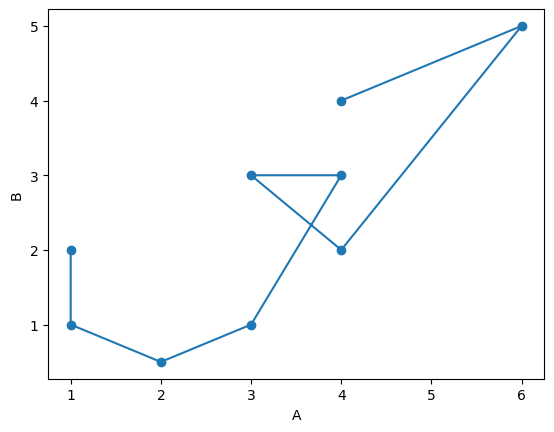

In [31]:
plt.plot(A,B,marker='o')
plt.xlabel('A')
plt.ylabel('B')
plt.show()

## 4. Calculate Mean Square Error (MSE) of A and B with the formulae where n is the no:  of sample data points

In [32]:
def MeanSquaredError(A,B):
    return np.sum((A-B)**2)/len(A)

In [33]:
MSE = MeanSquaredError(A,B)
print(MSE)

1.4722222222222223


## 5. Modify the above equation with the following cost function. Implement as a function with prototype def compute_cost_function(n,t1,A,B)

In [34]:
def compute_cost_function(n,t1,A,B):
    return np.sum((t1*A-B)**2)/(2*n)

Take h(x) =t1*x and t1= 0.5 Modify the above code iterating for different values of t1 and calculate ( 1).Try with t1 =0.1,0.3,0.5,0.7,0.8. Plot a graph with t1 on X-axis and ( 1)  on  Y-axis.  [hint  sum_squared_error  =  np.square(np.dot(features,  theta)  - values).sum() cost = sum_squared_error / (2*m)]

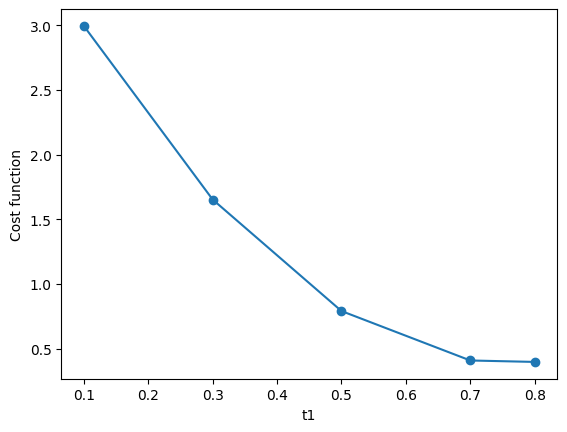

In [35]:
t1_values = [0.1, 0.3, 0.5, 0.7, 0.8]

cost_values = []
for t1 in t1_values:
    cost = compute_cost_function(len(A), t1, A, B)
    cost_values.append(cost)

plt.plot(t1_values, cost_values, marker='o')
plt.xlabel('t1')
plt.ylabel('Cost function')
plt.show()

# PART B : Linear Regression Implementation  

### a.Generate a new data set from student scores with one feature studytime and output variable average grade = (G1+G2+G3)/3

In [36]:
df = pd.read_csv('datasets_52721_99691_student-mat.csv')

In [37]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [38]:
df['average_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3
df1 = df[['studytime','average_grade']]
df1.head()
df1.to_csv('PB.csv')

### b.Load the new data set

In [39]:
df = pd.read_csv('PB.csv')

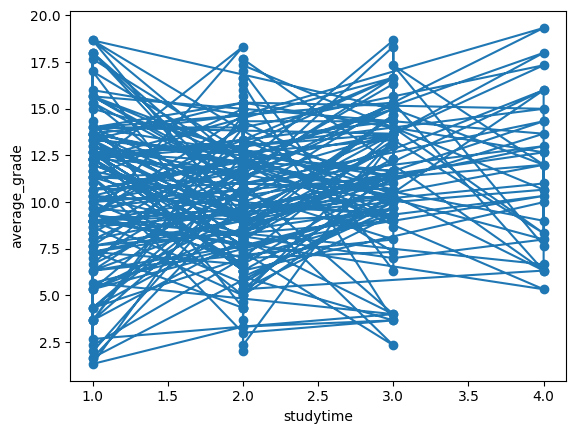

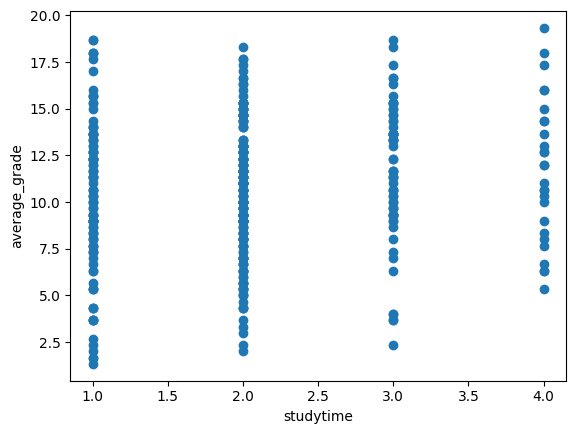

In [40]:
plt.plot(df['studytime'],df['average_grade'],marker='o')
plt.xlabel('studytime')
plt.ylabel('average_grade')
plt.show()
plt.scatter(df['studytime'],df['average_grade'])
plt.xlabel('studytime')
plt.ylabel('average_grade')
plt.show()

### d.Implement linear regression using inbuilt package python Scikit  

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df['studytime'], df['average_grade'], test_size=0.2)

#due to the error, we need to reshape the data
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse=mean_squared_error(y_test, y_pred)
print("MeanSquaredError: ",mse)



MeanSquaredError:  12.584300821291308


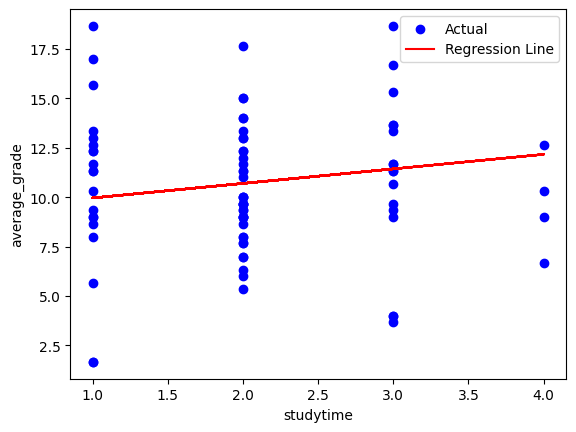

In [42]:
plt.scatter(X_test, y_test, marker='o', label='Actual', color='blue')
plt.plot(X_test, y_pred, label='Regression Line', color='red')
plt.xlabel('studytime')
plt.ylabel('average_grade')
plt.legend()
plt.show()

### e.Implement  gradient  descent  algorithm  with  the  function  prototype  def gradient_descent(alpha, x, y, max_iter=1500): where alpha is the learning rate, x is the input feature vector. y is the target. Subject the feature vector to normalisation step if needed. Convergence criteria: when no: of iterations exceed max_iter.   [hint sum_squared_error = np.square(np.dot(features, theta) - values).sum() cost = sum_squared_error / (2*m)]

In [43]:
def normalize_feature(A):
    return (A - np.mean(A)) / np.std(A)

def gradient_descent(alpha, x,y, max_iter=1500):
    m = len(y)
    x = normalize_feature(x)
    x = np.c_[np.ones((m,1)), x]

    n= x.shape[1]

    theta = np.zeros(n)

    for _ in range(max_iter):
        predictions = np.dot(x, theta)
        errors = np.subtract(predictions, y)
        gradient = np.dot(x.transpose(), errors) / m
        theta = theta - alpha * gradient
        cost = np.sum(errors ** 2) / (2 * m)
    return theta,cost


### f.Vary learning rate from 0.1 to 0.9 and observe the learned parameter.

In [44]:
alphas = np.arange(0.1, 1.0, 0.1)

for alpha in alphas:
    theta, cost = gradient_descent(alpha, df['studytime'], df['average_grade'])
    print(f'Learning rate: {alpha:.1f}, theta: {theta}, cost: {cost}')


Learning rate: 0.1, theta: [10.67932489  0.49682683], cost: 6.69239454434365
Learning rate: 0.2, theta: [10.67932489  0.49682683], cost: 6.69239454434365
Learning rate: 0.3, theta: [10.67932489  0.49682683], cost: 6.69239454434365
Learning rate: 0.4, theta: [10.67932489  0.49682683], cost: 6.69239454434365
Learning rate: 0.5, theta: [10.67932489  0.49682683], cost: 6.69239454434365
Learning rate: 0.6, theta: [10.67932489  0.49682683], cost: 6.69239454434365
Learning rate: 0.7, theta: [10.67932489  0.49682683], cost: 6.69239454434365
Learning rate: 0.8, theta: [10.67932489  0.49682683], cost: 6.69239454434365
Learning rate: 0.9, theta: [10.67932489  0.49682683], cost: 6.69239454434365


### g.Draw the contour plot of cost function and simulate the steps of gradient descent.  Example contour for a function  xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j] fmesh = f(np.array([xmesh, ymesh])) plt.contour(xmesh, ymesh, fmesh) def f(x):     return 0.5*x[0]**2 + 2.5*x[1]**2

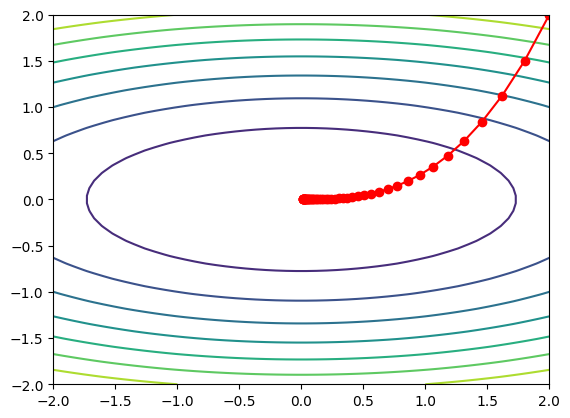

In [45]:
def f(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2

def gradient(x):
    return np.array([x[0],2.5*x[1]])

alpha = 0.1
x = np.array([2,2])
history = [x]

for i in range(50):
    x = x - alpha * gradient(x)
    history.append(x)

history = np.array(history)
xmesh, ymesh = np.mgrid[-2:2:50j, -2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
plt.contour(xmesh, ymesh, fmesh)
plt.plot(history[:,0], history[:,1], 'o-', color='red')
plt.show()

### h.Do simple k-fold and repeated k-fold. Compute error metrics ME, MAE, MSE, RMSE and compare.

In [46]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math
x = df1['studytime'].values.reshape(-1, 1) # Assuming df1 is the DataFrame containing the data
y = df1['average_grade'].values
kf = KFold(n_splits=5, random_state=None)
for train_index, test_index in kf.split(x):
#print("Train:", train_index, "\nValidation:",test_index)
    X_train, X_test = x[train_index], x[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    # Standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # Training the Model
    model = LinearRegression()
    model.fit( X_train, Y_train.ravel() )
    # Predicting Test Data Set
    Y_pred = model.predict( X_test )
    # Evaluation metrics
print("ME: ", np.mean(Y_pred - Y_test))
print("MAE: ", mean_absolute_error(Y_test, Y_pred))
print("MSE: ", mean_squared_error(Y_test, Y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(Y_test, Y_pred)))
print("\n\n")

ME:  0.33769483264722283
MAE:  2.8271585245126865
MSE:  12.104238265707936
RMSE:  3.479114580709859





In [47]:
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math
x = df1['studytime'].values.reshape(-1, 1) # Assuming df1 is the DataFrame containing the data
y = df1['average_grade'].values
kf = RepeatedKFold(n_splits=5, random_state=None)
for train_index, test_index in kf.split(x):
    #print("Train:", train_index, "\nValidation:",test_index)
    X_train, X_test = x[train_index], x[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    # Standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # Training the Model
    model = LinearRegression()
    model.fit( X_train, Y_train.ravel() )
    # Predicting Test Data Set
    Y_pred = model.predict( X_test )
# Evaluation metrics
print("ME: ", np.mean(Y_pred - Y_test))
print("MAE: ", mean_absolute_error(Y_test, Y_pred))
print("MSE: ", mean_squared_error(Y_test, Y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(Y_test, Y_pred)))
print("\n\n")

ME:  -0.022765652887783774
MAE:  2.6477928233032504
MSE:  11.17407197197857
RMSE:  3.3427641214986394





# PART B : Extra Credit

# 1. Implement gradient descend for multivariate linear regression to fit data in full data set

In [48]:
df = pd.read_csv('datasets_52721_99691_student-mat.csv')

Iteration:  0  Cost:  56.587310099568185
Iteration:  100  Cost:  7.569943655025929
Iteration:  200  Cost:  6.707828831246229
Iteration:  300  Cost:  6.6926660017575905
Iteration:  400  Cost:  6.6923993187221535


Iteration:  500  Cost:  6.692394628315165
Iteration:  600  Cost:  6.692394545820537
Iteration:  700  Cost:  6.692394544369626
Iteration:  800  Cost:  6.692394544344109
Iteration:  900  Cost:  6.692394544343659
Iteration:  1000  Cost:  6.692394544343651
Iteration:  1100  Cost:  6.692394544343651
Iteration:  1200  Cost:  6.69239454434365
Iteration:  1300  Cost:  6.69239454434365
Iteration:  1400  Cost:  6.69239454434365
Theta: [[10.67932489]
 [ 0.49682683]], Cost: 6.692394544343651


Text(0, 0.5, 'Cost')

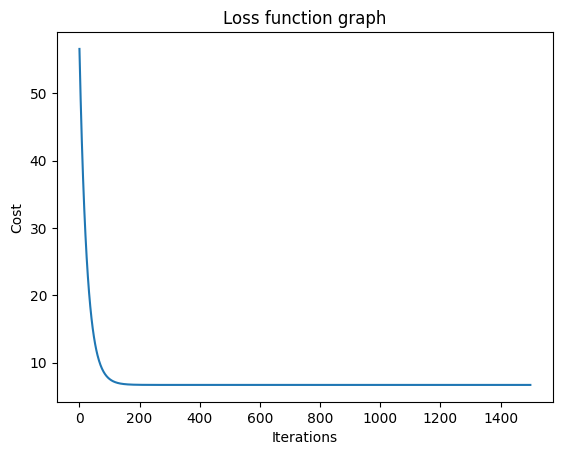

In [49]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels = ['school', 'sex', 'address','Pstatus','famsize', 'Mjob', 'Fjob']

df.fillna(0,axis=1,inplace=True)
def normalize_features(features):
    # Normalization function
    mean = np.mean(features, axis=0)
    std_dev = np.std(features, axis=0)
    normalized_features = (features - mean) / std_dev
    return normalized_features
def gradient_descent_multi(alpha, x, y, max_iter=1500):
    y_new = np.reshape(y, (len(y), 1))
    vectorX = np.c_[np.ones((len(x), 1)), x]
    theta = np.random.randn(x.shape[1]+1, 1)
    costs = []
    m = len(x)
    for i in range(max_iter):
        gradients = 2/m * vectorX.T.dot(vectorX.dot(theta) - y_new)
        theta = theta - alpha * gradients
        y_pred = vectorX.dot(theta)
        cost_value = mean_squared_error(y,y_pred)/2
        costs.append(cost_value)
        if i%100 == 0:
            print("Iteration: ",i," Cost: ",cost_value)
    return theta, costs, cost_value
alpha = 0.01
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = df1['average_grade'].values
theta, costs, cost = gradient_descent_multi(alpha, x, y)
print(f"Theta: {theta}, Cost: {cost}")
plt.plot(costs)
plt.title('Loss function graph')
plt.xlabel('Iterations')
plt.ylabel('Cost')

## 2.Analyze  impact  of  each  input  variable  on  the  output  variable  average grade(g1+g2+g3/3).  Plot  each  input  variable  vs  average  grade  and  analyse  the relationship.

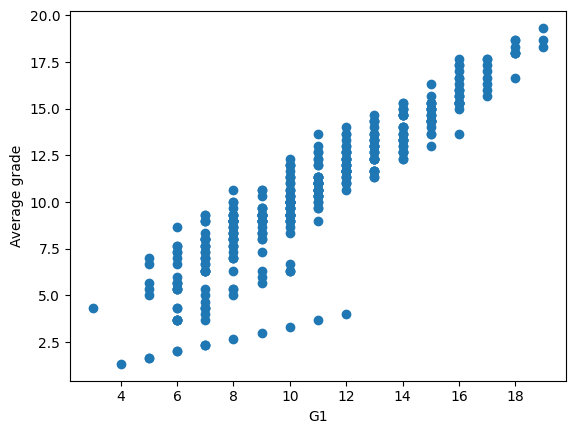

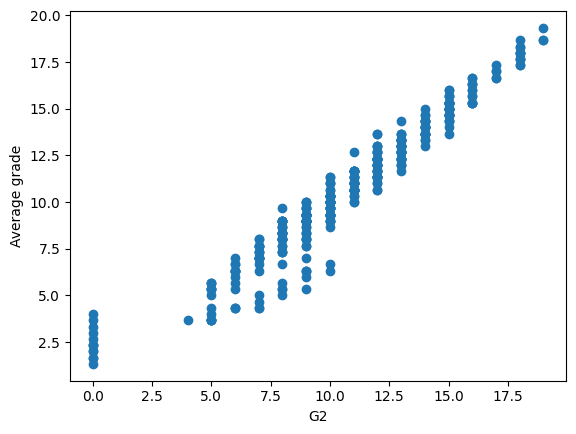

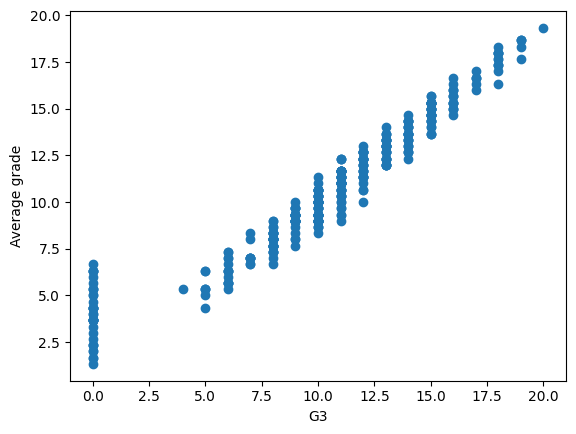

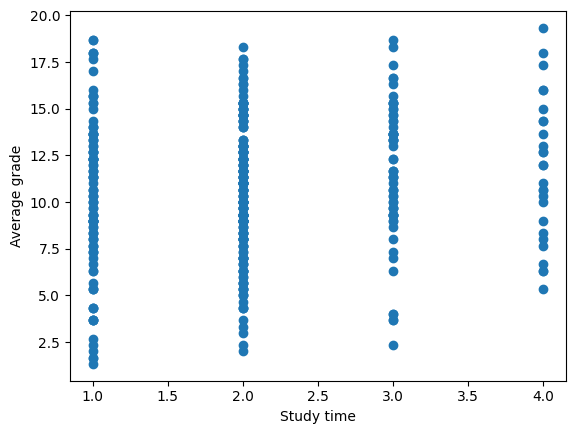

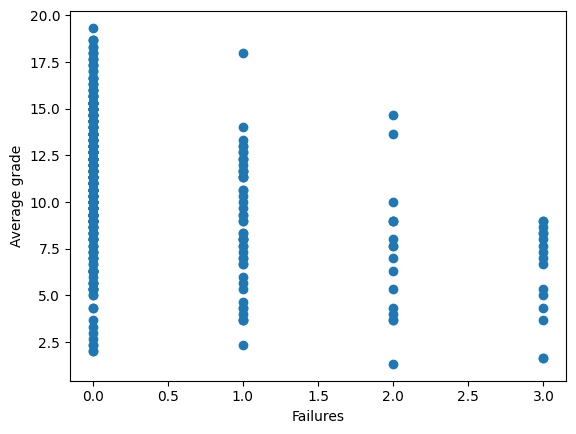

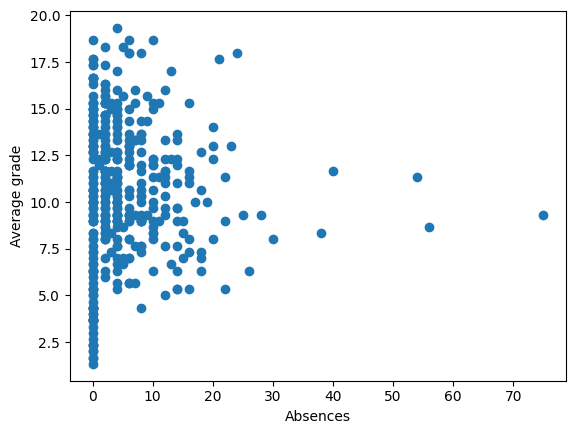

In [50]:
import matplotlib.pyplot as plt
df['average_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3
# plot G1 vs average grade
plt.scatter(df['G1'], df['average_grade'])
plt.xlabel('G1')
plt.ylabel('Average grade')
plt.show()

# plot G2 vs average grade
plt.scatter(df['G2'], df['average_grade'])
plt.xlabel('G2')
plt.ylabel('Average grade')
plt.show()

# plot G3 vs average grade
plt.scatter(df['G3'], df['average_grade'])
plt.xlabel('G3')
plt.ylabel('Average grade')
plt.show()

# plot studytime vs average grade
plt.scatter(df['studytime'], df['average_grade'])
plt.xlabel('Study time')
plt.ylabel('Average grade')
plt.show()

# plot failures vs average grade
plt.scatter(df['failures'], df['average_grade'])
plt.xlabel('Failures')
plt.ylabel('Average grade')
plt.show()

# plot absences vs average grade
plt.scatter(df['absences'], df['average_grade'])
plt.xlabel('Absences')
plt.ylabel('Average grade')
plt.show()